In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
import requests 
import time
from datetime import datetime

In [20]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | torbay
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | kavieng
Processing Record 5 of Set 1 | montrose
Processing Record 6 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | jawhar
Processing Record 9 of Set 1 | galgani
City not found. Skipping...
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | disraeli
Processing Record 12 of Set 1 | rawson
Processing Record 13 of Set 1 | samusu
City not found. Skipping...
Processing Record 14 of Set 1 | shakawe
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | nayoro
Processing Record 17 of Set 1 | hit
Processing Record 18 of Set 1 | nuristan
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | leshukonskoye
Processing Record 2

Processing Record 40 of Set 4 | tura
Processing Record 41 of Set 4 | necochea
Processing Record 42 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 43 of Set 4 | surt
Processing Record 44 of Set 4 | souillac
Processing Record 45 of Set 4 | carnarvon
Processing Record 46 of Set 4 | guerrero negro
Processing Record 47 of Set 4 | havre-saint-pierre
Processing Record 48 of Set 4 | cockburn town
Processing Record 49 of Set 4 | kajaani
Processing Record 50 of Set 4 | bubaque
Processing Record 1 of Set 5 | kristiinankaupunki
Processing Record 2 of Set 5 | la maddalena
Processing Record 3 of Set 5 | north bend
Processing Record 4 of Set 5 | meyungs
City not found. Skipping...
Processing Record 5 of Set 5 | tomatlan
Processing Record 6 of Set 5 | pacific grove
Processing Record 7 of Set 5 | nola
Processing Record 8 of Set 5 | faanui
Processing Record 9 of Set 5 | belaya gora
Processing Record 10 of Set 5 | kirkuk
Processing Record 11 of Set 5 | aljezur
Processing Record 12 o

Processing Record 31 of Set 8 | port said
Processing Record 32 of Set 8 | yar-sale
Processing Record 33 of Set 8 | mehamn
Processing Record 34 of Set 8 | ossora
Processing Record 35 of Set 8 | vangaindrano
Processing Record 36 of Set 8 | yerofey pavlovich
Processing Record 37 of Set 8 | ribeira grande
Processing Record 38 of Set 8 | houma
Processing Record 39 of Set 8 | capivari
Processing Record 40 of Set 8 | sefophe
Processing Record 41 of Set 8 | iracoubo
Processing Record 42 of Set 8 | victoria
Processing Record 43 of Set 8 | severo-kurilsk
Processing Record 44 of Set 8 | sioux lookout
Processing Record 45 of Set 8 | aklavik
Processing Record 46 of Set 8 | labuhan
Processing Record 47 of Set 8 | blairmore
Processing Record 48 of Set 8 | kon tum
Processing Record 49 of Set 8 | akita
Processing Record 50 of Set 8 | bakhmach
Processing Record 1 of Set 9 | aksarka
Processing Record 2 of Set 9 | longyearbyen
Processing Record 3 of Set 9 | louisbourg
City not found. Skipping...
Processin

Processing Record 18 of Set 12 | tall kayf
Processing Record 19 of Set 12 | luderitz
Processing Record 20 of Set 12 | alofi
Processing Record 21 of Set 12 | vallee-jonction
City not found. Skipping...
Processing Record 22 of Set 12 | sharkan
Processing Record 23 of Set 12 | syzran
Processing Record 24 of Set 12 | villazon
Processing Record 25 of Set 12 | ola
Processing Record 26 of Set 12 | mercedes
Processing Record 27 of Set 12 | cabinda
Processing Record 28 of Set 12 | talsi
Processing Record 29 of Set 12 | hurghada
Processing Record 30 of Set 12 | ust-omchug
Processing Record 31 of Set 12 | naica
Processing Record 32 of Set 12 | kilindoni
Processing Record 33 of Set 12 | makinsk
Processing Record 34 of Set 12 | laje
Processing Record 35 of Set 12 | usinsk
Processing Record 36 of Set 12 | bitam
Processing Record 37 of Set 12 | kirakira
Processing Record 38 of Set 12 | fenoarivo
Processing Record 39 of Set 12 | chagda
City not found. Skipping...
Processing Record 40 of Set 12 | mezen

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,79.20,70,2,17.45,PF,2022-02-06 21:15:05
1,Torbay,47.6666,-52.7314,14.76,77,40,13.80,CA,2022-02-06 21:17:35
2,Kapaa,22.0752,-159.3190,79.12,73,75,3.00,US,2022-02-06 21:20:27
3,Kavieng,-2.5744,150.7967,81.50,77,71,3.53,PG,2022-02-06 21:22:27
4,Montrose,38.4166,-108.2673,31.41,54,4,7.05,US,2022-02-06 21:20:24
...,...,...,...,...,...,...,...,...,...
577,Praya,14.9215,-23.5087,70.34,78,20,17.27,CV,2022-02-06 21:37:43
578,Bud,39.4470,-86.1758,39.18,55,45,6.20,US,2022-02-06 21:37:43
579,Hay River,60.8156,-115.7999,22.98,80,75,8.05,CA,2022-02-06 21:37:43
580,Ulagan,50.6321,87.9563,-12.51,81,30,2.84,RU,2022-02-06 21:37:44


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [17]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-02-06 21:15:05,-23.1203,-134.9692,79.20,70,2,17.45
1,Torbay,CA,2022-02-06 21:17:35,47.6666,-52.7314,14.76,77,40,13.80
2,Kapaa,US,2022-02-06 21:20:27,22.0752,-159.3190,79.12,73,75,3.00
3,Kavieng,PG,2022-02-06 21:22:27,-2.5744,150.7967,81.50,77,71,3.53
4,Montrose,US,2022-02-06 21:20:24,38.4166,-108.2673,31.41,54,4,7.05
...,...,...,...,...,...,...,...,...,...
577,Praya,CV,2022-02-06 21:37:43,14.9215,-23.5087,70.34,78,20,17.27
578,Bud,US,2022-02-06 21:37:43,39.4470,-86.1758,39.18,55,45,6.20
579,Hay River,CA,2022-02-06 21:37:43,60.8156,-115.7999,22.98,80,75,8.05
580,Ulagan,RU,2022-02-06 21:37:44,50.6321,87.9563,-12.51,81,30,2.84


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

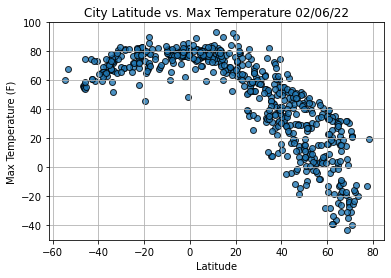

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

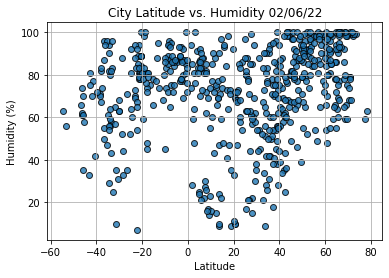

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

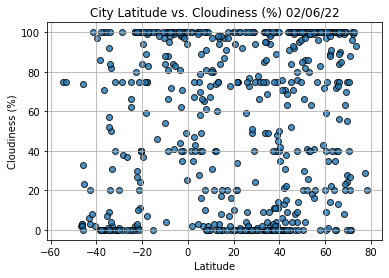

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

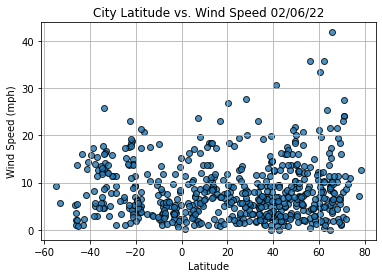

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()